In [1]:
!nvidia-smi

Mon Dec 25 06:22:57 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.7 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
from IPython import display
display.clear_output()

In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
%cd {HOME}
!yolo task = detect mode = predict model = yolov8n.pt conf =0.25 source = 'https://media.roboflow.com/notebooks/examples/dog.jpeg'  save = True

/content
100% 6.23M/6.23M [00:00<00:00, 76.2MB/s]

2023-12-25 06:23:35.298214: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-25 06:23:35.298267: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-25 06:23:35.300378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-25 06:23:37.369100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<

/content


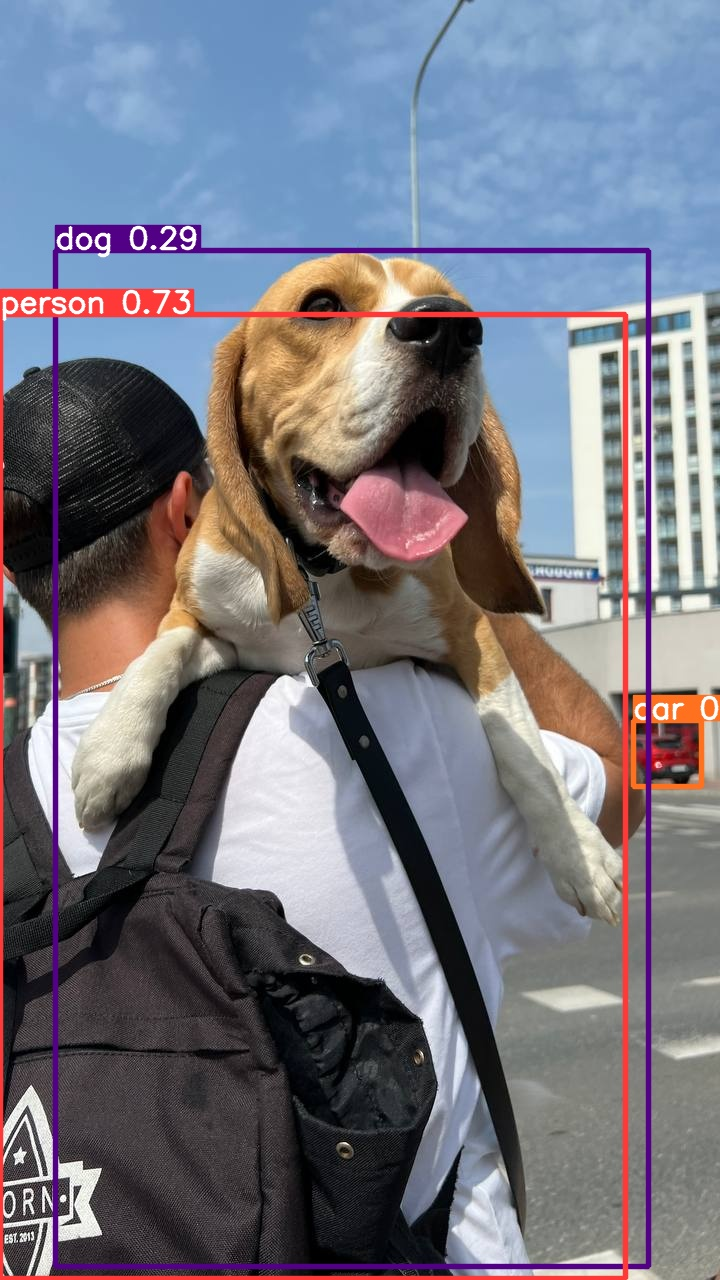

In [8]:
%cd {HOME}
Image(filename = "/content/runs/detect/predict/dog.jpeg" , height = 400 )

In [9]:
model = YOLO (f"{HOME}/yolov8n.pt")
results  =  model.predict (source ='https://media.roboflow.com/notebooks/examples/dog.jpeg' , conf = 0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [10]:
len(results )

1

In [11]:
results [0].boxes

Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([3, 6])
dtype: torch.float32
 + tensor([[0.00000e+00, 3.14000e+02, 6.25000e+02, 1.27800e+03, 7.27125e-01, 0.00000e+00],
        [5.50000e+01, 2.50000e+02, 6.48000e+02, 1.26600e+03, 2.90664e-01, 1.60000e+01],
        [6.33000e+02, 7.20000e+02, 7.01000e+02, 7.86000e+02, 2.84555e-01, 2.00000e+00]], device='cuda:0')

In [12]:
results [0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [13]:
results [0].boxes.conf




tensor([0.72713, 0.29066, 0.28455], device='cuda:0')

In [14]:
results [0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [19]:
!mkdir {HOME}/datasets

%cd {HOME} /datasets
!pip install roboflow

mkdir: cannot create directory ‘/content/datasets’: File exists
[Errno 2] No such file or directory: '/content /datasets'
/content


In [20]:
from roboflow import Roboflow

rf = Roboflow(api_key = "CmnkvMweQCTCx4D47IPb")
project = rf.workspace("akshay-dilip-kumar-ois4s").project("pizzza-topping")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to pizzza-topping-1 in yolov8:: 100%|██████████| 1052/1052 [00:00<00:00, 3646.28it/s]


In [21]:
%cd {HOME}
!yolo task = detect mode = train model = yolov8s.pt data = {dataset.location}/data.yaml epochs = 5 imgsz = 640 plots = True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/pizzza-topping-1/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, s

/content


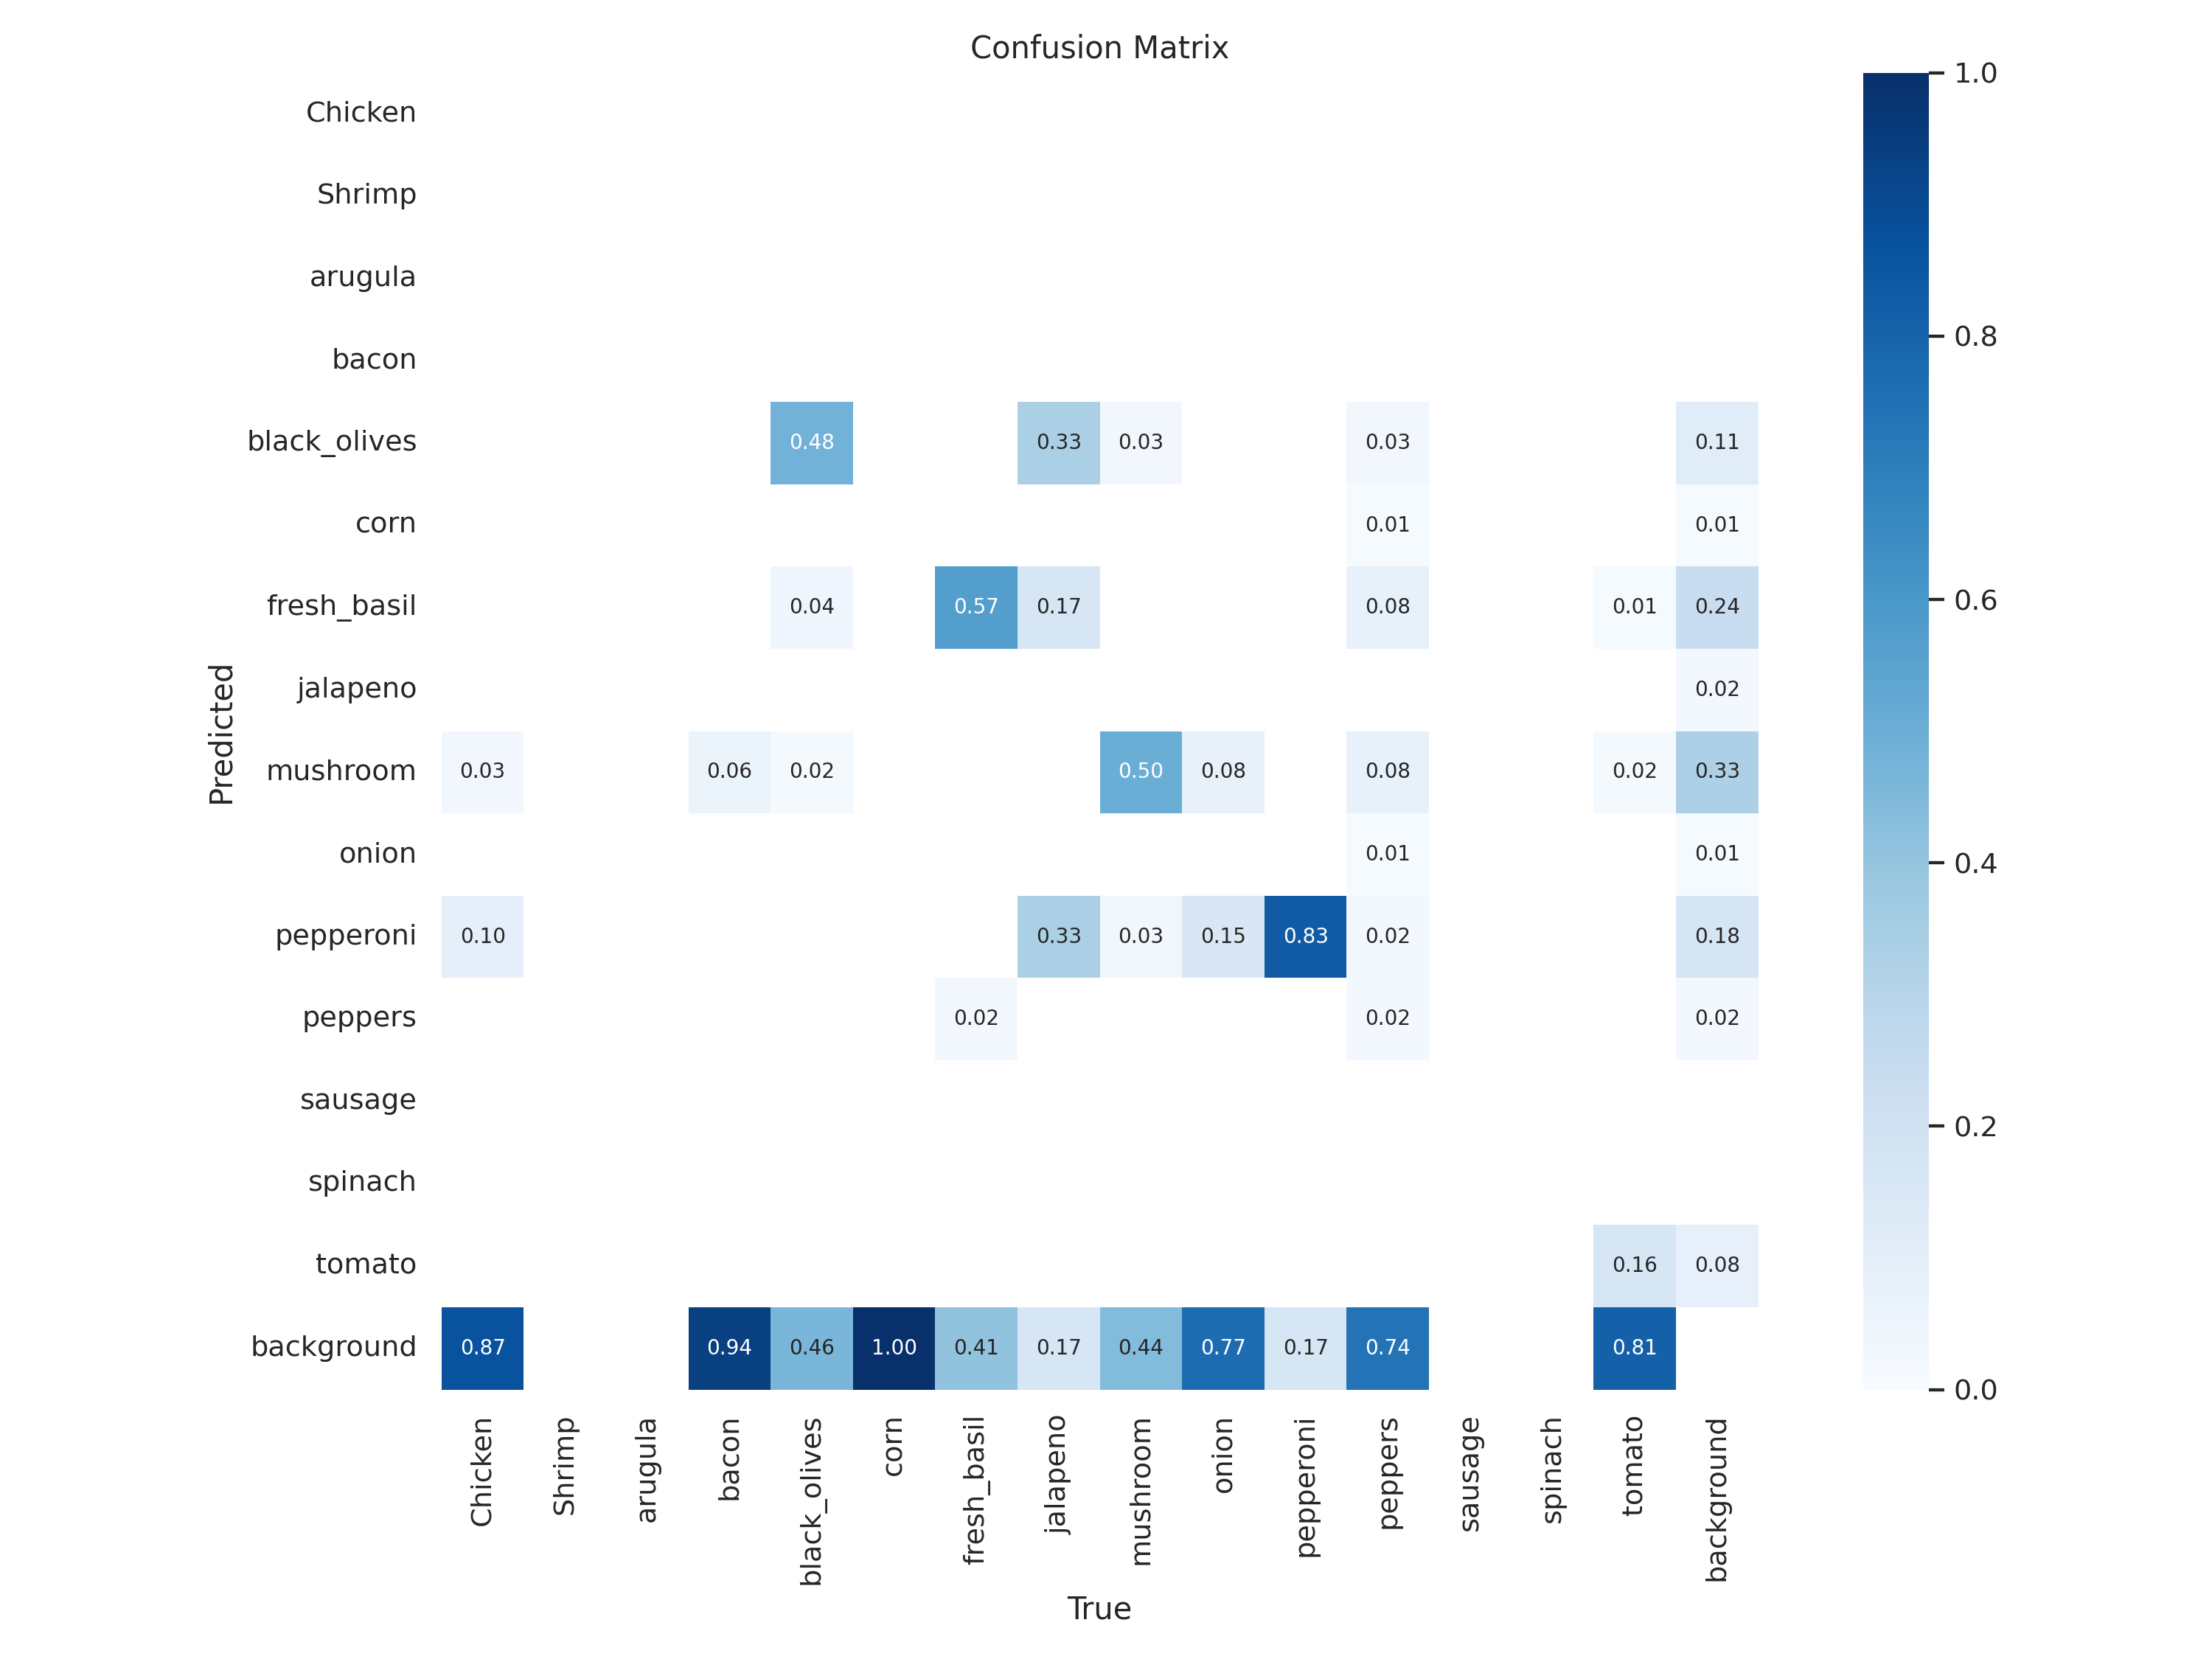

In [22]:
%cd {HOME}
Image(filename = f"{HOME}/runs/detect/train2/confusion_matrix.png")

/content


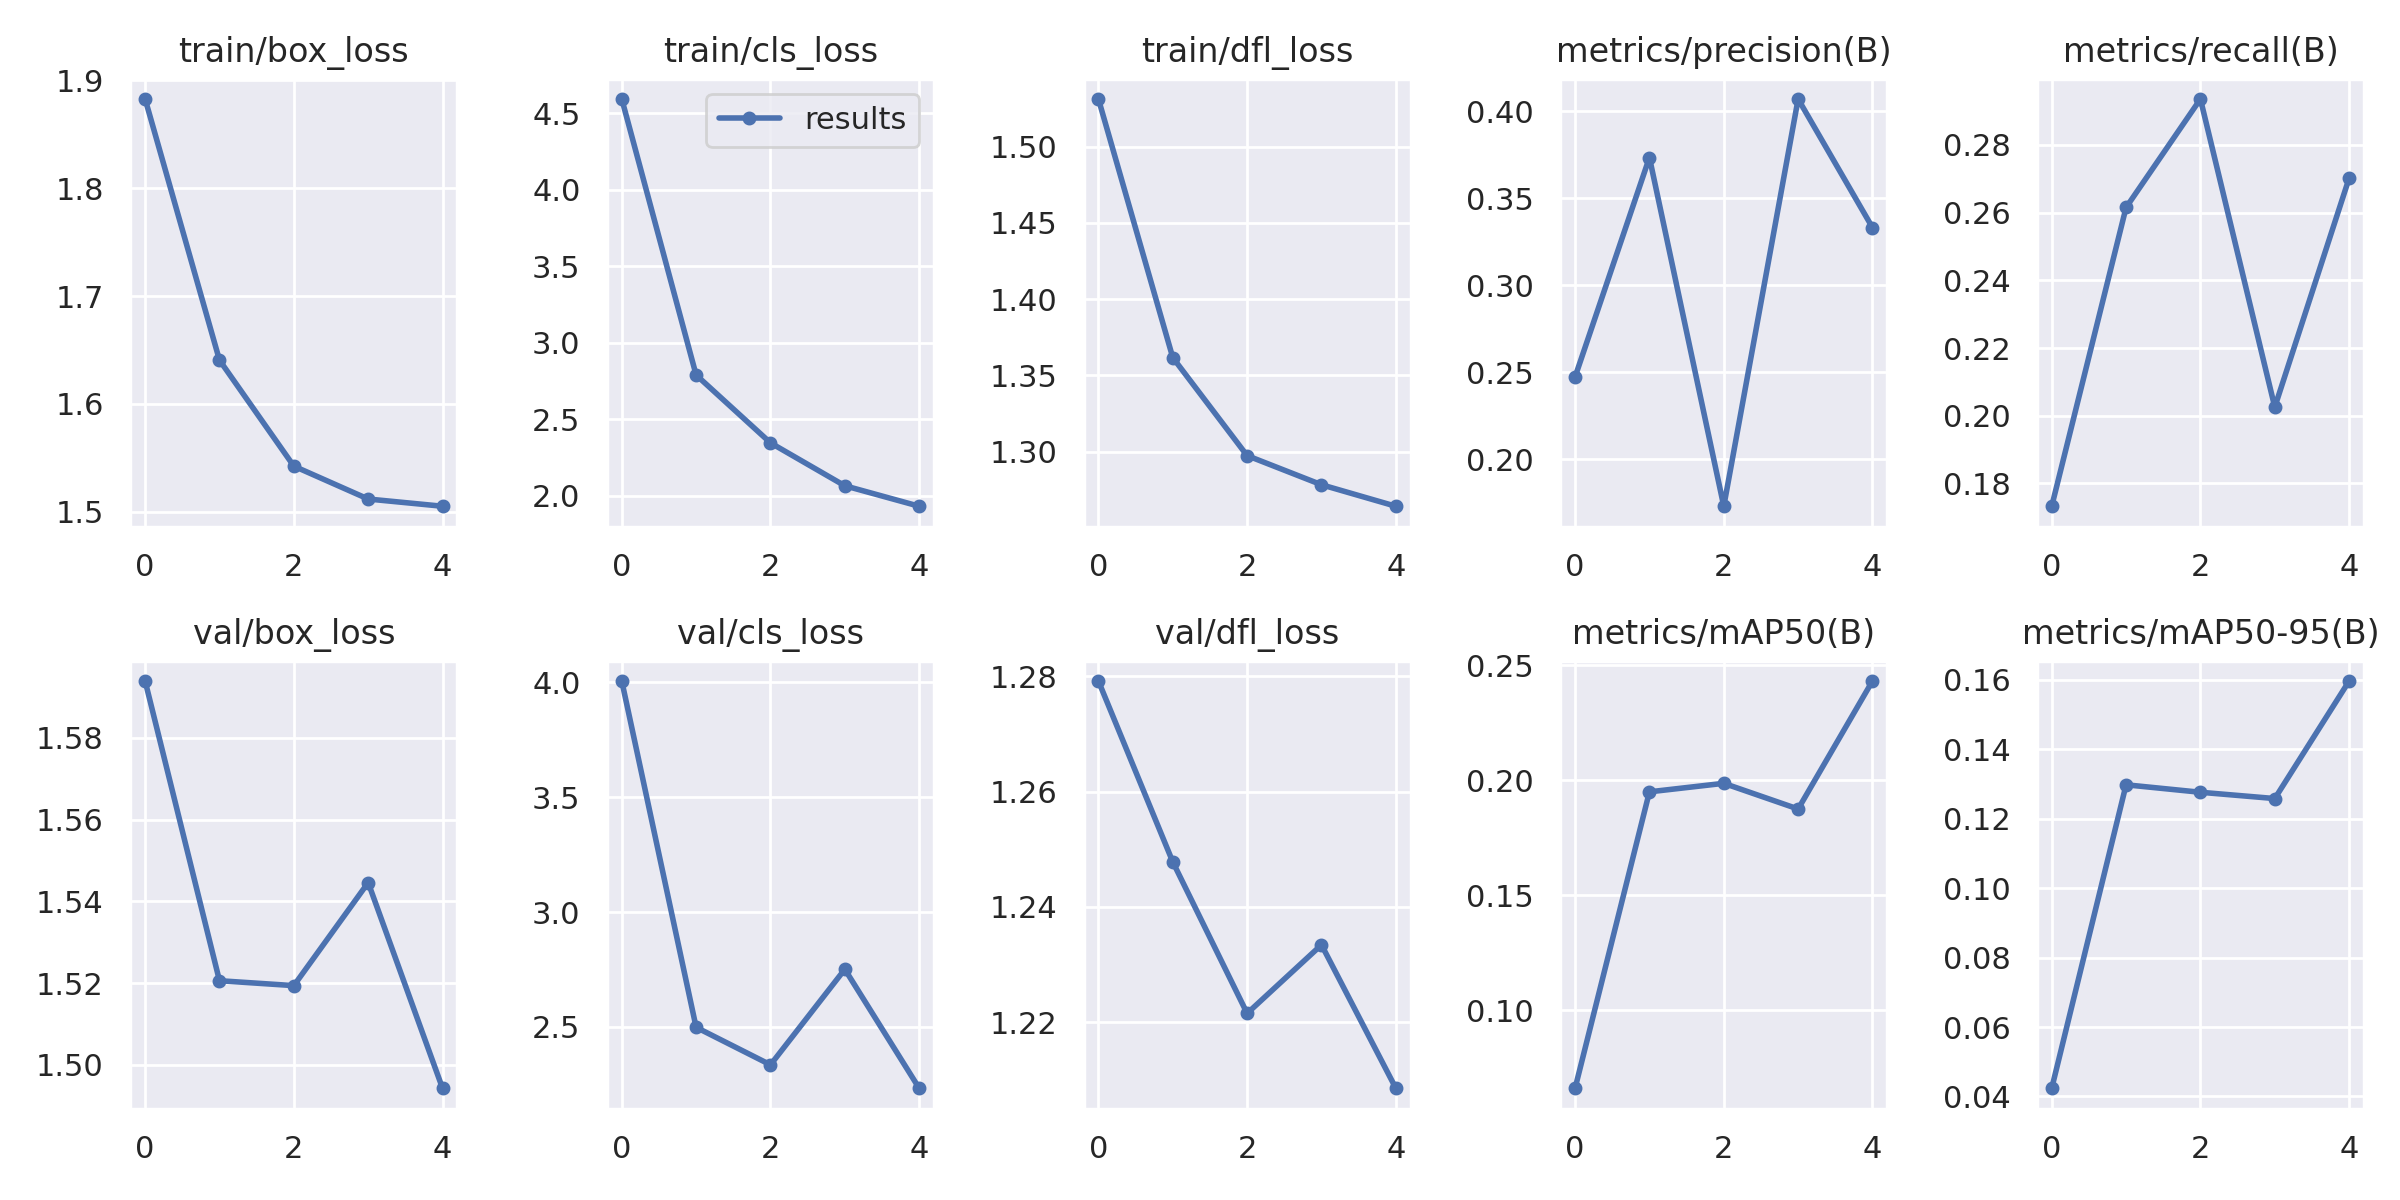

In [23]:
%cd {HOME}
Image(filename = f"{HOME}/runs/detect/train2/results.png")

/content


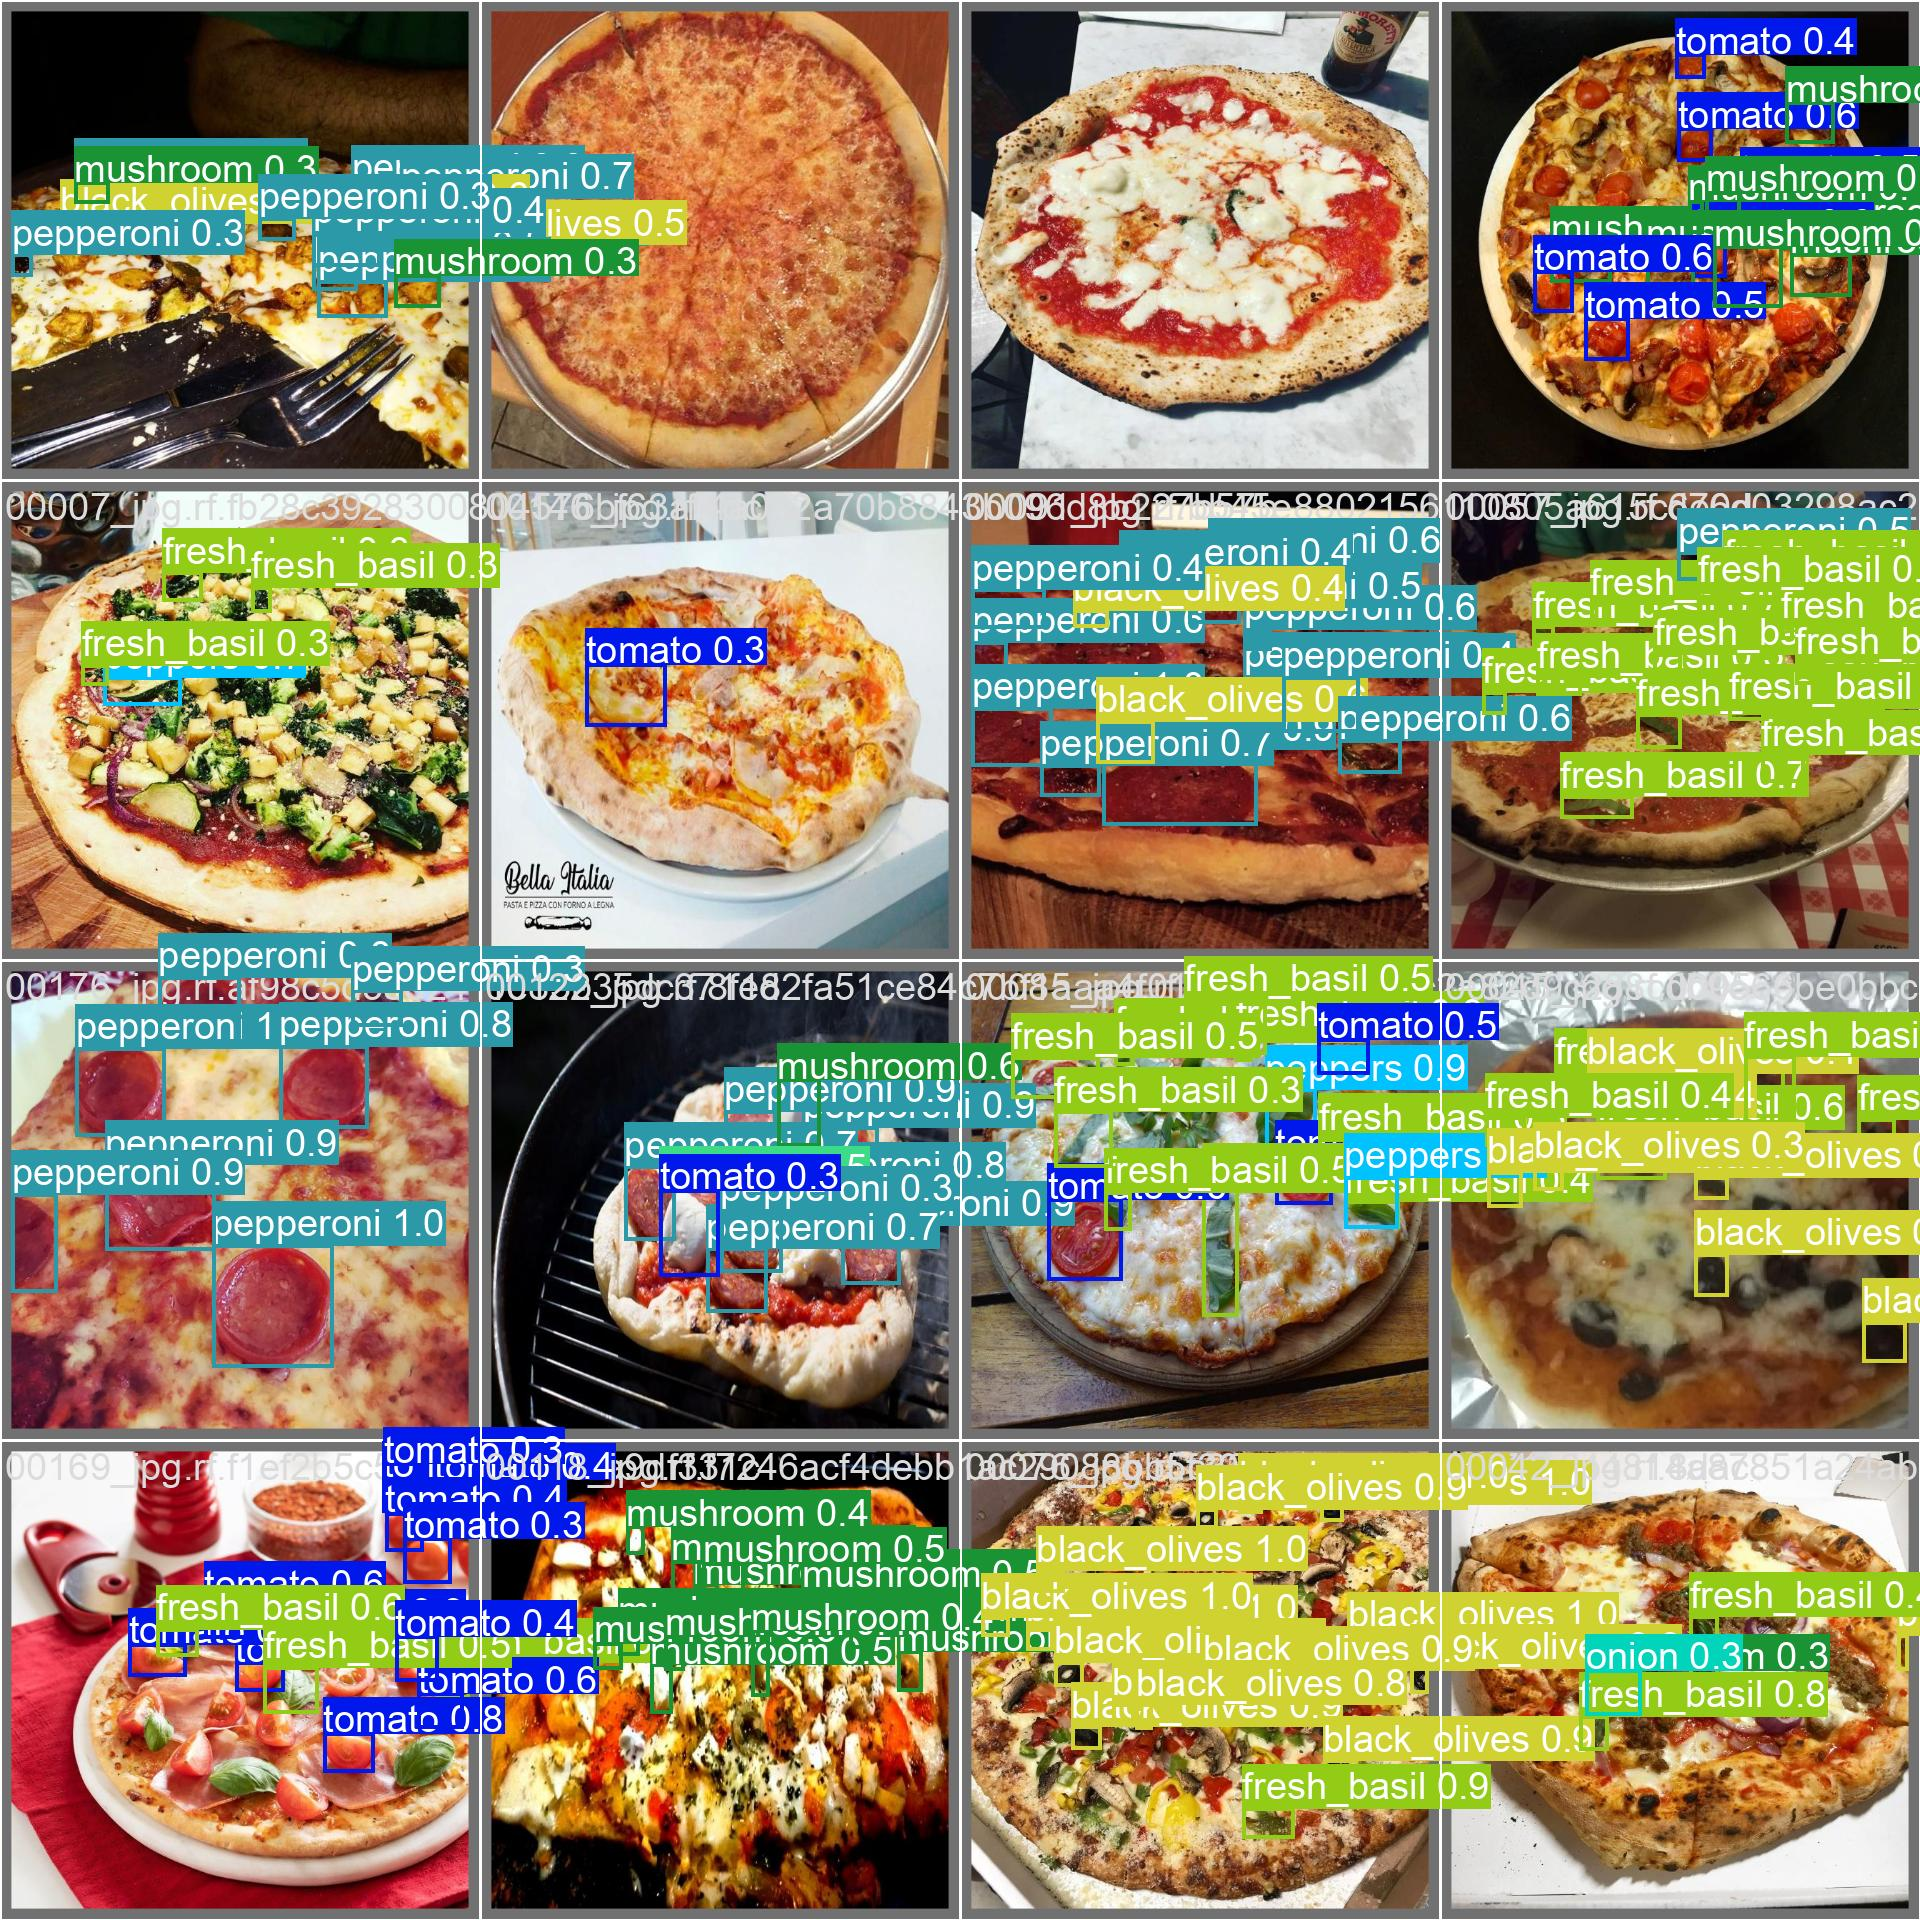

In [25]:
%cd {HOME}
Image(filename = f"{HOME}/runs/detect/train2/val_batch0_pred.jpg")

In [26]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-12-25 06:32:50.093804: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-25 06:32:50.093874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-25 06:32:50.095683: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-25 06:32:51.873781: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/20 /content/pi

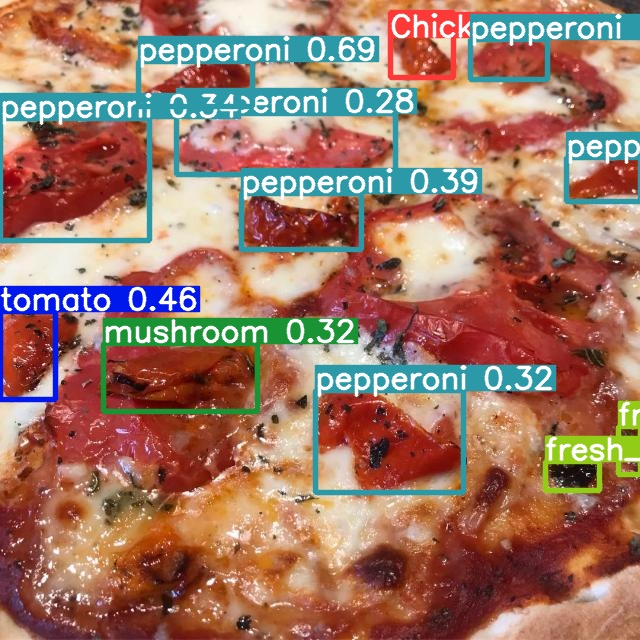

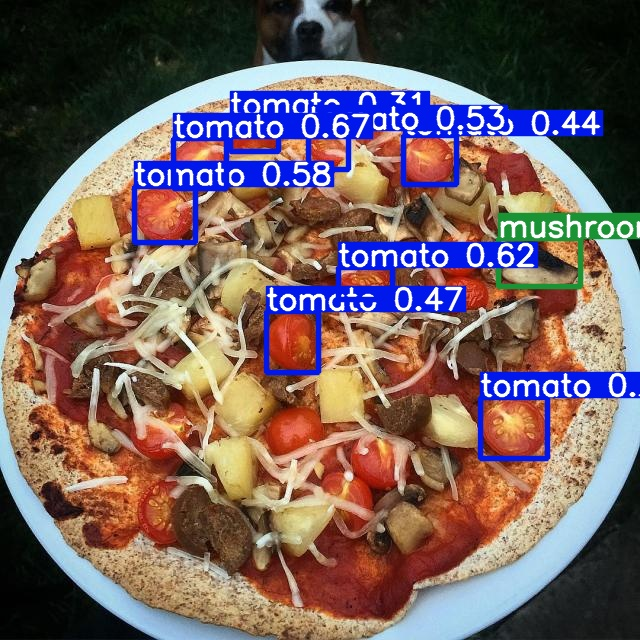

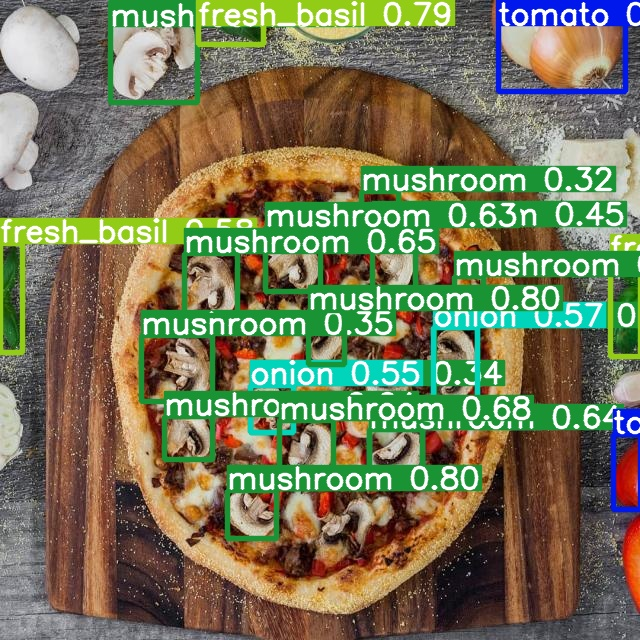

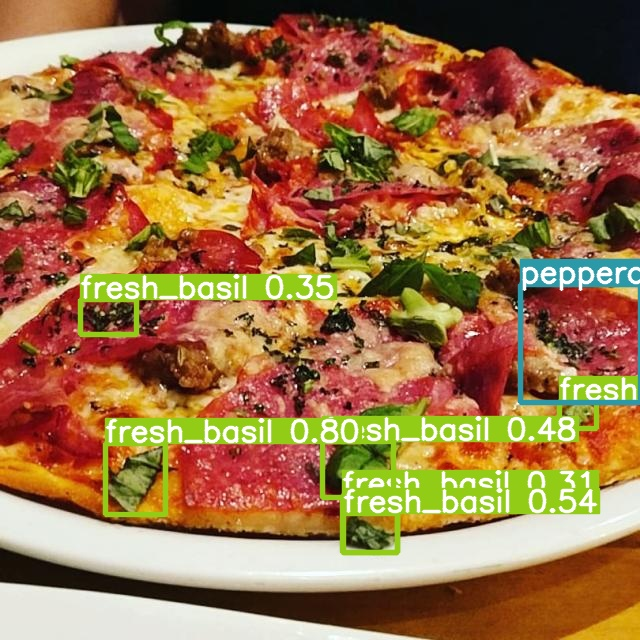

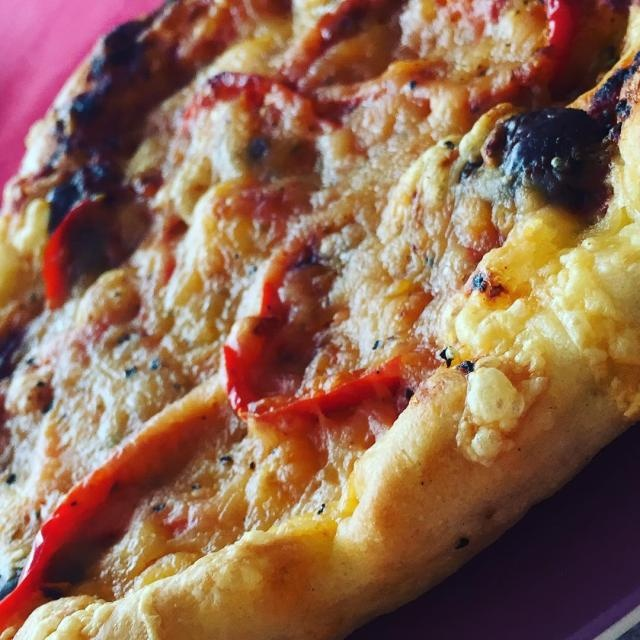

In [27]:
from glob import glob
for im_path in glob(f"{HOME}/runs/detect/predict2/*.jpg")[:5]:
  display(Image(filename = im_path, width = 500))
  print("\n")